<a href="https://colab.research.google.com/github/notsogeekynair/datascwpython/blob/main/data_science_with_python_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #1
Description : loading dataset
"""
import pandas as pd
import numpy as np
data = pd.read_csv('rawdata.csv')



In [ ]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #1
Description : choosing features and creating new label
"""
#choosing group 3 - MSTV, Width, Mode, Variance
features = ['MSTV', 'Width', 'Mode', 'Variance','NSP']
group3 = data[features]

#new NSP classification
group3['newNSP'] = group3['NSP'].apply(lambda x:1 if x==1 else 0)
group3.head()

In [18]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #2
Description : Using Naive Bayes Classifier
"""
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

x = group3.drop(['NSP', 'newNSP'], axis=1)
y = group3['newNSP']

#50/50 test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=154)#using last 3 digits of BU ID for random_state

#Naive Bayes Classifier
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)
y_pred = nbclassifier.predict(x_test)

#accuracy
print("Accuracy score : ",accuracy_score(y_test, y_pred))
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",cm)

Accuracy score :  0.7761053621825024
Confusion Matrix : 
 [[ 46 205]
 [ 33 779]]


In [19]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #3
Description : Using Decision Tree Classifier
"""
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifiier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train, y_train)
y_pred = dtClassifier.predict(x_test)

#accuracy
print("Accuracy score : ",accuracy_score(y_test, y_pred))

#confusion matrix
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Accuracy score :  0.8767638758231421
Confusion Matrix : 
 [[189  62]
 [ 69 743]]


[[0.14581373 0.11665099 0.14675447 0.14581373 0.11665099]
 [0.14581373 0.11665099 0.13828786 0.12229539 0.11476952]
 [0.14581373 0.13546566 0.13452493 0.11853246 0.09971778]
 [0.14581373 0.1335842  0.11947319 0.11288805 0.09689558]
 [0.14581373 0.13734713 0.11759172 0.11006585 0.09407338]
 [0.14581373 0.1335842  0.11476952 0.11665099 0.09313264]
 [0.14581373 0.1335842  0.11100659 0.11382879 0.09219191]
 [0.14581373 0.13546566 0.10348071 0.10912512 0.09501411]
 [0.14581373 0.13076199 0.10348071 0.10724365 0.09595484]
 [0.16274694 0.13170273 0.10442145 0.10536218 0.09783631]]
0.9078080903104422
(7, 5)


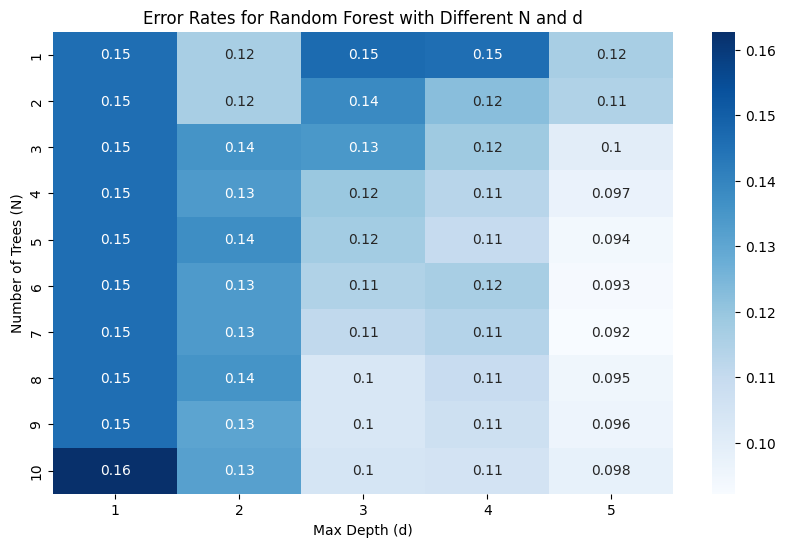

In [25]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #4
Description : Using Random Forest Classifier
"""
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
errors= np.zeros((10,5))
best = 0
bestcombo =(0,0)

for N in range(1,11):
  for d in range(1,6):
    rfClassifier = RandomForestClassifier(n_estimators=N, max_depth=d,criterion ='entropy',random_state=154)
    rfClassifier.fit(x_train, y_train)
    y_pred = rfClassifier.predict(x_test)
    error=1-accuracy_score(y_test, y_pred)
    errors[N-1,d-1]=error

    if 1-error > best:
      best = 1-error
      bestcombo = (N,d)

print(errors)
print(best)
print(bestcombo)

#plotting
# Plotting the error rates as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(errors, annot=True, cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=range(1, 11))

plt.title('Error Rates for Random Forest with Different N and d')
plt.xlabel('Max Depth (d)')
plt.ylabel('Number of Trees (N)')
plt.show()

In [28]:
"""
Varun Nair
Class: CS 677
Date: 11/20/2024
Homework Problem #4
Description : Using Random Forest Classifier for the best combo
"""
#using best N,d combo (7,5)
rfClassifier = RandomForestClassifier(n_estimators=7, max_depth=5,criterion ='entropy',random_state=154)
rfClassifier.fit(x_train, y_train)
y_pred = rfClassifier.predict(x_test)

print("Confusion matrix for best combo : \n",confusion_matrix(y_test,y_pred))
print("Accuracy score for best combo : ",accuracy_score(y_test, y_pred))

Confusion matrix for best combo : 
 [[178  73]
 [ 25 787]]
Accuracy score for best combo :  0.9078080903104422
